<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Time_Series/sample_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_excel('Total(3-10).xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [4]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.tail()

In [15]:
df_day.drop(df_day.index[245], inplace=True)

In [16]:
df_day.tail()

,ds,y
240,2019-10-27,14953.20
241,2019-10-28,15162.24
242,2019-10-29,15343.92
243,2019-10-30,15344.40
244,2019-10-31,15507.12


In [17]:
m = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True, uncertainty_samples=1000)
m.fit(df_day)

In [22]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days

In [ ]:
future.tail(7)

In [23]:
forecast = m.predict(future)

In [ ]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

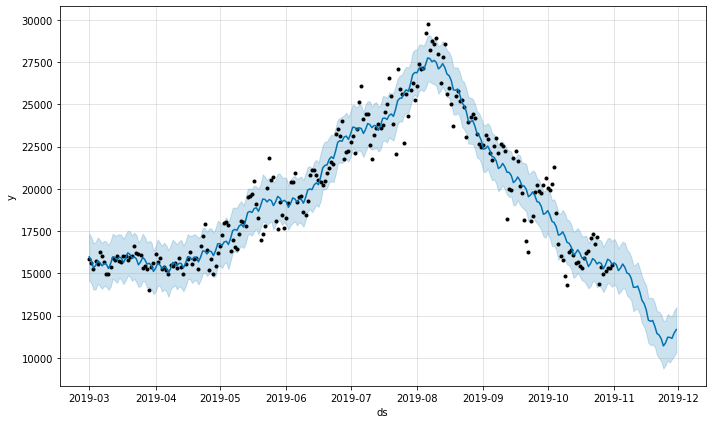

In [24]:
fig1 = m.plot(forecast)

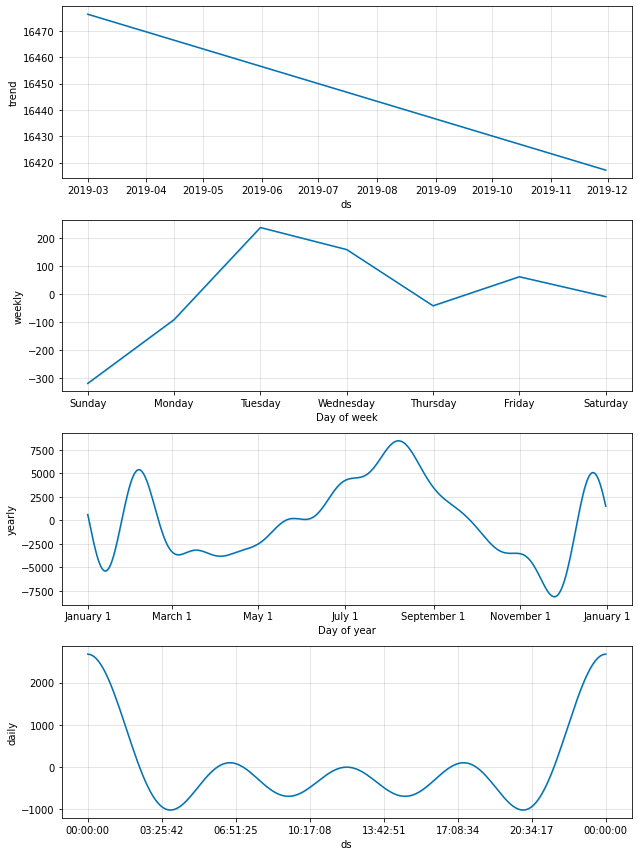

In [25]:
fig2 = m.plot_components(forecast)